In [8]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu
from sklearn.metrics import mean_squared_error, mean_absolute_error
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU


# Carregar os dados
df = pd.read_csv("planilhas/dfDias7desloc.csv", sep=';', parse_dates=['Data'], index_col="Data")

# Dividir os dados em conjuntos de treinamento e teste
split = int(0.7 * len(df))
treino = df[:split]
teste = df[split:]

# Preparar dados de treinamento e teste
x_treino = treino.drop(columns='CasosDiasTarget').values
y_treino = treino['CasosDiasTarget'].values

x_teste = teste.drop(columns='CasosDiasTarget').values
y_teste = teste['CasosDiasTarget'].values
y_testeGraf = teste['CasosDiasTarget']



In [9]:
# Redimensionar os dados para a entrada do LSTM (número de amostras, número de passos de tempo, número de recursos)
n_steps = 1  # número de passos de tempo
n_features = x_treino.shape[1]  # número de recursos
x_treino = x_treino.reshape((x_treino.shape[0], n_steps, n_features))
x_teste = x_teste.reshape((x_teste.shape[0], n_steps, n_features))

modelos = []

modelos.clear()

# Construir modelo LSTM - 1 CAMADA
lstm1 = Sequential()
lstm1.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
lstm1.add(Dense(1))
lstm1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1)

lstm2 = Sequential()
lstm2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm2.add(LSTM(50, activation='relu'))
lstm2.add(Dense(1))
lstm2.compile(optimizer='adam', loss='mse')
modelos.append(lstm2)

lstm3 = Sequential()
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm3.add(LSTM(50, activation='relu'))
lstm3.add(Dense(1))
lstm3.compile(optimizer='adam', loss='mse')
modelos.append(lstm3)

gru1 = Sequential()
gru1.add(GRU(50, activation='relu', input_shape=(n_steps, n_features)))
gru1.add(Dense(1))
gru1.compile(optimizer='adam', loss='mse')
modelos.append(gru1)

# Modelo 2 com duas camadas GRU
gru2 = Sequential()
gru2.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru2.add(GRU(50, activation='relu'))
gru2.add(Dense(1))
gru2.compile(optimizer='adam', loss='mse')
modelos.append(gru2)

# Modelo 3 com três camadas GRU
gru3 = Sequential()
gru3.add(GRU(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
gru3.add(GRU(50, activation='relu', return_sequences=True))
gru3.add(GRU(50, activation='relu'))
gru3.add(Dense(1))
gru3.compile(optimizer='adam', loss='mse')
modelos.append(gru3)

# Modelo 1 camda lstm e 1 camada GRU
lstm1gru1 = Sequential()
lstm1gru1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1gru1.add(GRU(50, activation='relu'))
lstm1gru1.add(Dense(1))
lstm1gru1.compile(optimizer='adam', loss='mse')
modelos.append(lstm1gru1)

# Modelo 1 camda lstm e 1 camada GRU 1 camada lstm e 1 camada GRU
lstm1Gru1_2 = Sequential()
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
lstm1Gru1_2.add(GRU(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(LSTM(50, activation='relu', return_sequences=True))
lstm1Gru1_2.add(GRU(50, activation='relu'))
lstm1Gru1_2.add(Dense(1))
lstm1Gru1_2.compile(optimizer='adam', loss='mse')
modelos.append(lstm1Gru1_2)





c:\Users\Bruno\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
indexModelos = ['LSTM1','LSTM2','LSTM3','GRU1','GRU2','GRU3', 'LSTM1GRU1', 'LSTM1GRU1LSTM1GRU1']

dfModelos = pd.DataFrame(modelos, index = indexModelos )
display(dfModelos)

i=0
for m in modelos:
  #print(dfModelos.index[i])
  i+=1
  #print(m)

,0
LSTM1,"<Sequential name=sequential_8, built=True>"
LSTM2,"<Sequential name=sequential_9, built=True>"
LSTM3,"<Sequential name=sequential_10, built=True>"
GRU1,"<Sequential name=sequential_11, built=True>"
GRU2,"<Sequential name=sequential_12, built=True>"
GRU3,"<Sequential name=sequential_13, built=True>"
LSTM1GRU1,"<Sequential name=sequential_14, built=True>"
LSTM1GRU1LSTM1GRU1,"<Sequential name=sequential_15, built=True>"


# TESTE

In [11]:
rangeN = 20

mae = []
mse =[]
rmse = []

maeModelos = []
mseModelos =[]
rmseModelos = []
nomes = []

opinioesModelos = []

epocas = [100]

melhor_validacao_RNN = float('inf')
modelo = 0

i=0

for j in range(rangeN):
    print(j+1)
    for m in modelos:
        for e in epocas:
            model = m
            model.fit(x_treino, y_treino, epochs=e, verbose=0)
            # Fazer previsões no conjunto de teste
            opiniaoRNN = model.predict(x_teste)
            mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)


            if mseRnn < melhor_validacao_RNN:
                bestParame = {'epocas': e, 'modeloNome': dfModelos.index[i], 'modelObjeto': m}



    nomeBestmodelo = bestParame['modeloNome']
    Bestmodelo = bestParame['modelObjeto']
    Bestmodelo.fit(x_treino, y_treino, epochs=e, verbose=0)
    opiniaoRNN = Bestmodelo.predict(x_teste)

    maeRnn = mean_absolute_error(y_teste, opiniaoRNN).round(2)
    mseRnn = mean_squared_error(y_teste, opiniaoRNN).round(2)
    rmseRnn = np.sqrt(mseRnn).round(2)


    nomes.append(nomeBestmodelo)
    mae.append(maeRnn)
    mse.append(mseRnn)
    rmse.append(rmseRnn)

maxnomeBestmodelo = max(set(nomes), key=nomes.count)

nomes.append(maxnomeBestmodelo)
mae.append(np.mean(mae))
mse.append(np.mean(mse))
rmse.append(np.mean(rmse))


dfRNN = pd.DataFrame({
    'nomeModelo': nomes,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
})

print("O ÚLTIMO VALOR (20) É A MÉDIA !!!")
display(dfRNN)
dfRNN.to_csv('resultadosModelos/dfRNN.csv', sep = ';', index = False, encoding='UTF-8')






1
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step
3
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step
13/13 ━━━━━━━━━━━━━━

,nomeModelo,MAE,MSE,RMSE
0,LSTM1,12.2500,458.4500,21.410
1,LSTM1,15.4100,761.2700,27.590
2,LSTM1,13.6500,592.1100,24.330
3,LSTM1,13.6100,595.6100,24.410
4,LSTM1,15.4700,754.7400,27.470
5,LSTM1,13.3800,531.9300,23.060
6,LSTM1,15.2500,668.5700,25.860
7,LSTM1,14.7600,660.7700,25.710
8,LSTM1,15.9700,775.7900,27.850
9,LSTM1,15.8500,769.1400,27.730


415
[[  5.893863 ]
 [  5.7147584]
 [  5.977328 ]
 [  5.628156 ]
 [ 44.023094 ]
 [ 48.10183  ]
 [ 26.543962 ]
 [  6.2865653]
 [  5.5434604]
 [  5.8654084]
 [ 11.200271 ]
 [ 43.55895  ]
 [ 43.55895  ]
 [ 70.87002  ]
 [ 31.435358 ]
 [ 24.325241 ]
 [ 43.55895  ]
 [ 67.99424  ]
 [ 76.09806  ]
 [121.9314   ]
 [125.30358  ]
 [ 43.55895  ]
 [ 18.786762 ]
 [164.61519  ]
 [ 81.99238  ]
 [117.13215  ]
 [ 93.520966 ]
 [113.45533  ]
 [ 43.55895  ]
 [ 18.908688 ]
 [ 81.768    ]
 [266.6986   ]
 [268.4727   ]
 [146.40546  ]
 [149.82088  ]
 [ 60.616825 ]
 [  3.8890986]
 [119.68627  ]
 [131.79686  ]
 [157.2286   ]
 [ 93.64606  ]
 [ 84.706505 ]
 [ 43.55895  ]
 [ 43.55895  ]
 [ 85.70186  ]
 [ 91.53698  ]
 [ 80.92596  ]
 [ 90.15189  ]
 [ 81.979546 ]
 [ 43.55895  ]
 [  5.1130824]
 [ 98.392365 ]
 [110.02671  ]
 [ 87.80344  ]
 [107.28277  ]
 [ 43.55895  ]
 [ 46.904648 ]
 [  4.3030314]
 [ 43.55895  ]
 [ 43.55895  ]
 [103.65064  ]
 [ 43.55895  ]
 [ 43.55895  ]
 [ 43.66443  ]
 [  5.146726 ]
 [ 43.55895  ]
 [ 43.

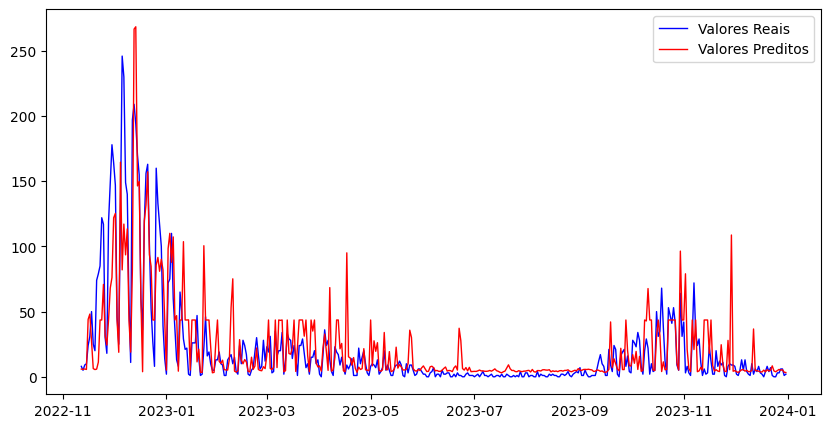

Numero de casos reais:  8737
Numero de casos predito:  9572


In [12]:
indexRnn = df[split:].index
print(len(indexRnn))

print((opiniaoRNN))
print(len(opiniaoRNN))

opiniaoRNN = opiniaoRNN.flatten()
serie_RNN = pd.Series(opiniaoRNN, index=indexRnn)




plt.figure(figsize=(10, 5))
plt.plot(y_testeGraf, label='Valores Reais', color='blue', linewidth=1  )
plt.plot(serie_RNN, label='Valores Preditos', color='red', linewidth=1)
plt.legend()
plt.savefig('graficos/4-RNN.pdf', dpi=300, bbox_inches = "tight")
plt.show()

n_pred = int(serie_RNN.sum())
print('Numero de casos reais: ', y_teste.sum())
print('Numero de casos predito: ', n_pred)